<a href="https://colab.research.google.com/github/BigyanBhatta/Deep-Learning-Improvement/blob/main/batch_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from mlxtend.plotting import plot_decision_regions

In [ ]:
X , y = make_circles(n_samples = 500, noise = 0.08, random_state = 42)

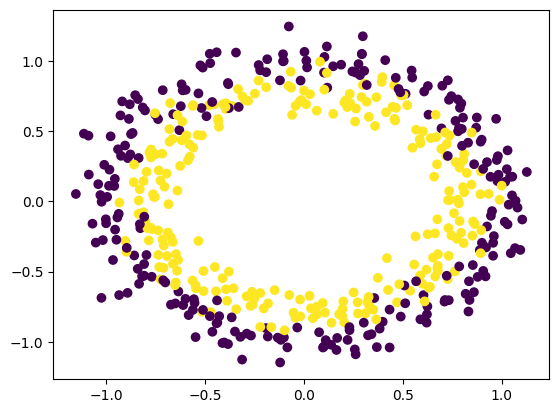

In [ ]:
plt.scatter(X[:, 0], X[:, -1], c = y)

In [ ]:
model = Sequential()
model.add(Dense(2, input_dim = 2, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
history = model.fit(X, y, epochs = 500, validation_split = 0.2, verbose = False)

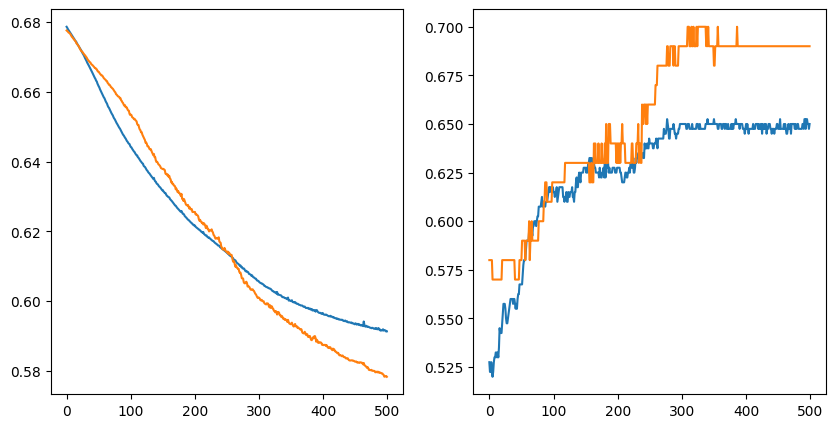

In [ ]:
plt.figure(figsize = (10,5))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()

In [ ]:
model1 = Sequential()
model1.add(Dense(2, input_dim = 2, activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dense(2, activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dense(1, activation = 'sigmoid'))


In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history1 = model1.fit(X, y, epochs = 500, verbose = False, validation_split = 0.2)

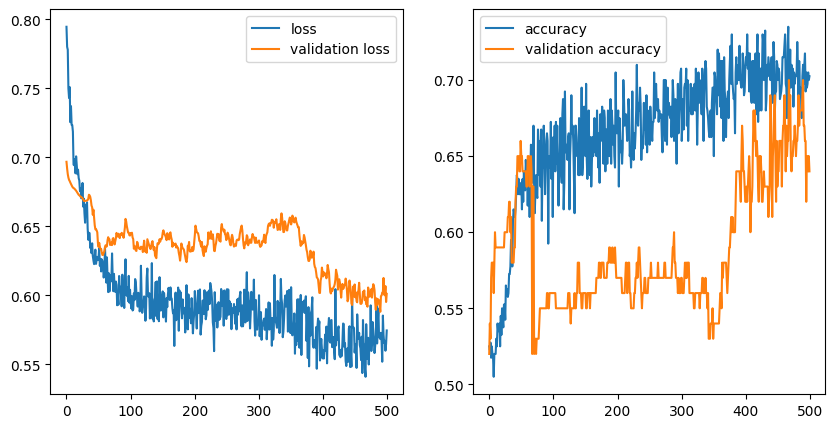

In [31]:
plt.figure(figsize = (10,5))

plt.subplot(121)
plt.plot(history1.history['loss'], label = 'loss')
plt.plot(history1.history['val_loss'], label = 'validation loss')
plt.legend()

plt.subplot(122)
plt.plot(history1.history['accuracy'], label = 'accuracy')
plt.plot(history1.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

15625/15625 [==============================] - 23s 1ms/step


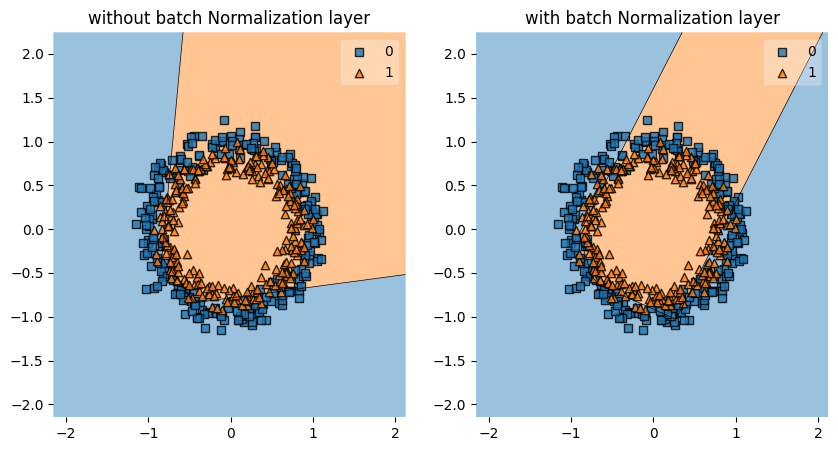

In [32]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.title('without batch Normalization layer')
plot_decision_regions(X, y, clf = model)

plt.subplot(122)
plt.title('with batch Normalization layer')
plot_decision_regions(X, y, clf = model1)

plt.show()

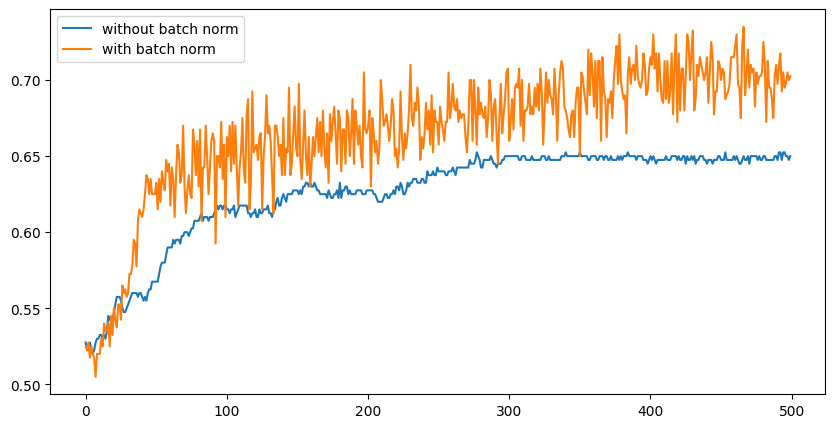

In [29]:
plt.figure(figsize = (10, 5))
plt.plot(history.history['accuracy'], label = 'without batch norm')
plt.plot(history1.history['accuracy'], label = 'with batch norm')
plt.legend()